(complex_and_trig)=
```{raw} html
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>
```

```{index} single: python
```

# 复数和三角函数
## 概述
本讲座介绍一些基础数学和三角函数知识。

这些概念本身既有用又有趣，在研究由线性差分方程或线性微分方程生成的动力学时，会带来巨大回报。

例如，这些工具是理解Paul Samuelson（1939年）{cite}`Samuelson1939`在其经典论文中关于投资加速器与凯恩斯消费函数相互作用的成果的关键，这是我们在讲座{doc}`Samuelson乘数加速器<dynam:samuelson>`中的主题。

除了为Samuelson的工作及其扩展提供基础外，本讲座还可以作为独立的快速回顾，回顾高中基础三角函数的关键结果。

那么让我们开始吧。

### 复数
复数有一个**实部**$x$和一个纯**虚部**$y$。

复数$z$的欧几里得形式、极坐标形式和三角形式是：

$$
z = x + iy = re^{i\theta} = r(\cos{\theta} + i \sin{\theta})
$$

上面的第二个等式被称为**欧拉公式**

- [欧拉](https://en.wikipedia.org/wiki/Leonhard_Euler)还贡献了许多其他公式！

$z$的复共轭$\bar z$定义为

$$
\bar z = x - iy = r e^{-i \theta} = r (\cos{\theta} - i \sin{\theta} )
$$

$x$是$z$的**实部**，$y$是$z$的**虚部**。

符号$| z |$ = $\sqrt{\bar{z}\cdot z} = r$表示$z$的**模**。

$r$是向量$(x,y)$到原点的欧几里得距离：

$$
r = |z| = \sqrt{x^2 + y^2}
$$

$\theta$是$(x,y)$相对于实轴的角度。

显然，$\theta$的正切是$\left(\frac{y}{x}\right)$。

因此，

$$
\theta = \tan^{-1} \Big( \frac{y}{x} \Big)
$$

三个基本三角函数是

$$
\cos{\theta} = \frac{x}{r} = \frac{e^{i\theta} + e^{-i\theta}}{2} , \quad
\sin{\theta} = \frac{y}{r} = \frac{e^{i\theta} - e^{-i\theta}}{2i} , \quad
\tan{\theta} = \frac{y}{x}
$$

我们需要以下导入：

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #设计默认的图像大小
import numpy as np
from sympy import (Symbol, symbols, Eq, nsolve, sqrt, cos, sin, simplify,
                  init_printing, integrate)

import matplotlib as mpl
FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

### 一个例子

考虑复数 $z = 1 + \sqrt{3} i$。

对于 $z = 1 + \sqrt{3} i$，$x = 1$，$y = \sqrt{3}$。

由此可得 $r = 2$ 且$\theta = \tan^{-1}(\sqrt{3}) = \frac{\pi}{3} = 60^o$。

让我们使用Python来绘制复数 $z = 1 + \sqrt{3} i$ 的三角形式。

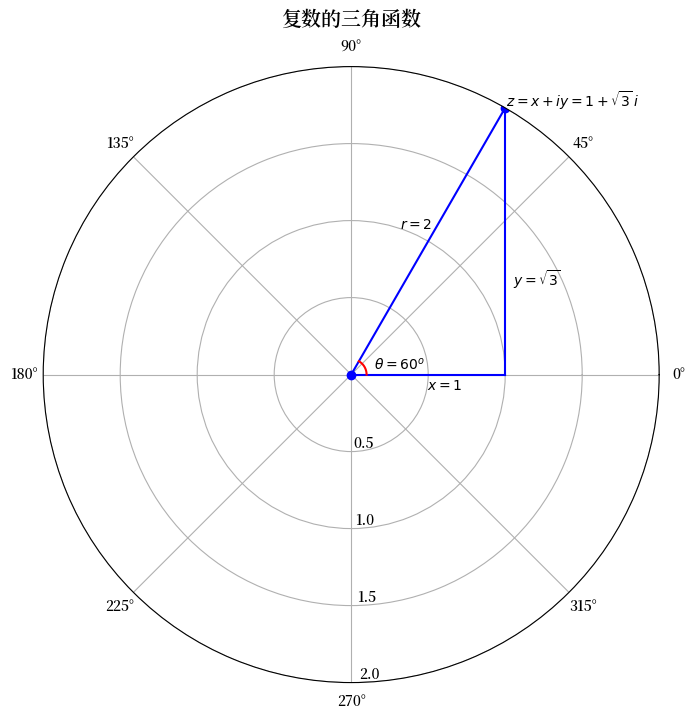

In [2]:
# 将值和函数简写
π = np.pi


# 设置参数
r = 2
θ = π/3
x = r * np.cos(θ)
x_range = np.linspace(0, x, 1000)
θ_range = np.linspace(0, θ, 1000)

# 画图
fig = plt.figure(figsize=(8, 8))
ax = plt.subplot(111, projection='polar')

ax.plot((0, θ), (0, r), marker='o', color='b')          # 绘制 r
ax.plot(np.zeros(x_range.shape), x_range, color='b')       # 绘制 x
ax.plot(θ_range, x / np.cos(θ_range), color='b')        # 绘制 y
ax.plot(θ_range, np.full(θ_range.shape, 0.1), color='r')  # 绘制 θ

ax.margins(0) # 从原点开始绘制

ax.set_title("复数的三角函数", va='bottom',
    fontsize='x-large')

ax.set_rmax(2)
ax.set_rticks((0.5, 1, 1.5, 2))  # 减少标记
ax.set_rlabel_position(-88.5)    # 将标记远离图像

ax.text(θ, r+0.01 , r'$z = x + iy = 1 + \sqrt{3}\, i$')   # 标记 z
ax.text(θ+0.2, 1 , '$r = 2$')                             # 标记 r
ax.text(0-0.2, 0.5, '$x = 1$')                            # 标记 x
ax.text(0.5, 1.2, r'$y = \sqrt{3}$')                      # 标记 y
ax.text(0.25, 0.15, r'$\theta = 60^o$')                   # 标记 θ

ax.grid(True)
plt.show()

## 德莫瓦定理

德莫瓦定理指出：

$$
(r(\cos{\theta} + i \sin{\theta}))^n =
r^n e^{in\theta} =
r^n(\cos{n\theta} + i \sin{n\theta})
$$

要证明德莫瓦定理，注意到

$$
(r(\cos{\theta} + i \sin{\theta}))^n = \big( re^{i\theta} \big)^n
$$

然后进行计算。

## 德莫瓦定理的应用

### 例1

我们可以使用德莫瓦定理来证明 $r = \sqrt{x^2 + y^2}$。

我们有

$$
\begin{aligned}
1 &= e^{i\theta} e^{-i\theta} \\
&= (\cos{\theta} + i \sin{\theta})(\cos{(\text{-}\theta)} + i \sin{(\text{-}\theta)}) \\
&= (\cos{\theta} + i \sin{\theta})(\cos{\theta} - i \sin{\theta}) \\
&= \cos^2{\theta} + \sin^2{\theta} \\
&= \frac{x^2}{r^2} + \frac{y^2}{r^2}
\end{aligned}
$$

因此

$$
x^2 + y^2 = r^2
$$

我们认识到这是**勾股定理**。

### 例2

设 $z = re^{i\theta}$ 且 $\bar{z} = re^{-i\theta}$，其中 $\bar{z}$ 是 $z$ 的**复共轭**。

$(z, \bar z)$ 构成一对**复共轭对**。

设 $a = pe^{i\omega}$ 和 $\bar{a} = pe^{-i\omega}$ 是另一对复共轭对。

对于整数序列 $n = 0, 1, 2, \ldots, $ 中的每个元素。

为此，我们可以应用德莫瓦公式。

因此，

$$
\begin{aligned}
x_n &= az^n + \bar{a}\bar{z}^n \\
&= p e^{i\omega} (re^{i\theta})^n + p e^{-i\omega} (re^{-i\theta})^n \\
&= pr^n e^{i (\omega + n\theta)} + pr^n e^{-i (\omega + n\theta)} \\
&= pr^n [\cos{(\omega + n\theta)} + i \sin{(\omega + n\theta)} +
         \cos{(\omega + n\theta)} - i \sin{(\omega + n\theta)}] \\
&= 2 pr^n \cos{(\omega + n\theta)}
\end{aligned}
$$

### 例3

这个例子提供了Samuelson在分析其乘数-加速器模型时所使用的核心机制 {cite}`Samuelson1939`。

因此，考虑一个**二阶线性差分方程**

$$
x_{n+2} = c_1 x_{n+1} + c_2 x_n
$$

其**特征多项式**为

$$
z^2 - c_1 z - c_2 = 0
$$

或

$$
(z^2 - c_1 z - c_2 ) = (z - z_1)(z- z_2) = 0
$$

具有根 $z_1, z_1$。

**解**是满足差分方程的序列 $\{x_n\}_{n=0}^\infty$。

在以下情况下，我们可以应用例2的公式来解决差分方程

- 差分方程特征多项式的根 $z_1, z_2$ 构成一对复共轭
- 给定初始条件 $x_0, x_1$ 的值

要解决差分方程，回想例2中

$$
x_n = 2 pr^n \cos{(\omega + n\theta)}
$$

其中 $\omega, p$ 是需要从初始条件 $x_1, x_0$ 中编码的信息确定的系数。

由于$x_0 = 2 p \cos{\omega}$ 且 $x_1 = 2 pr \cos{(\omega + \theta)}$，$x_1$ 与 $x_0$ 的比率为

$$
\frac{x_1}{x_0} = \frac{r \cos{(\omega + \theta)}}{\cos{\omega}}
$$

我们可以解这个方程得到 $\omega$，然后用 $x_0 = 2 pr^0 \cos{(\omega + n\theta)}$ 解出 $p$。

使用Python中的`sympy`包，我们能够解决并绘制给定不同 $n$ 值时 $x_n$ 的动态。

在这个例子中，我们设置初始值：
- $r = 0.9$
- $\theta = \frac{1}{4}\pi$
- $x_0 = 4$
- $x_1 = r \cdot 2\sqrt{2} = 1.8 \sqrt{2}$

我们首先使用`sympy`包中的`nsolve`基于上述初始条件数值求解 $\omega$ 和 $p$：

In [3]:
# 设置参数
r = 0.9
θ = π/4
x0 = 4
x1 = 2 * r * sqrt(2)

# 定义要计算的符号
ω, p = symbols('ω p', real=True)

# 求解  ω
## 注意：我们选择在 0 附近的解
eq1 = Eq(x1/x0 - r * cos(ω+θ) / cos(ω), 0)
ω = nsolve(eq1, ω, 0)
ω = float(ω)
print(f'ω = {ω:1.3f}')

# 求解 p
eq2 = Eq(x0 - 2 * p * cos(ω), 0)
p = nsolve(eq2, p, 0)
p = float(p)
print(f'p = {p:1.3f}')

ω = 0.000
p = 2.000


使用上面的代码，我们计算得出

$\omega = 0$ 和 $p = 2$。

然后我们将解出的 $\omega$ 和 $p$ 的值代入

并绘制动态图。

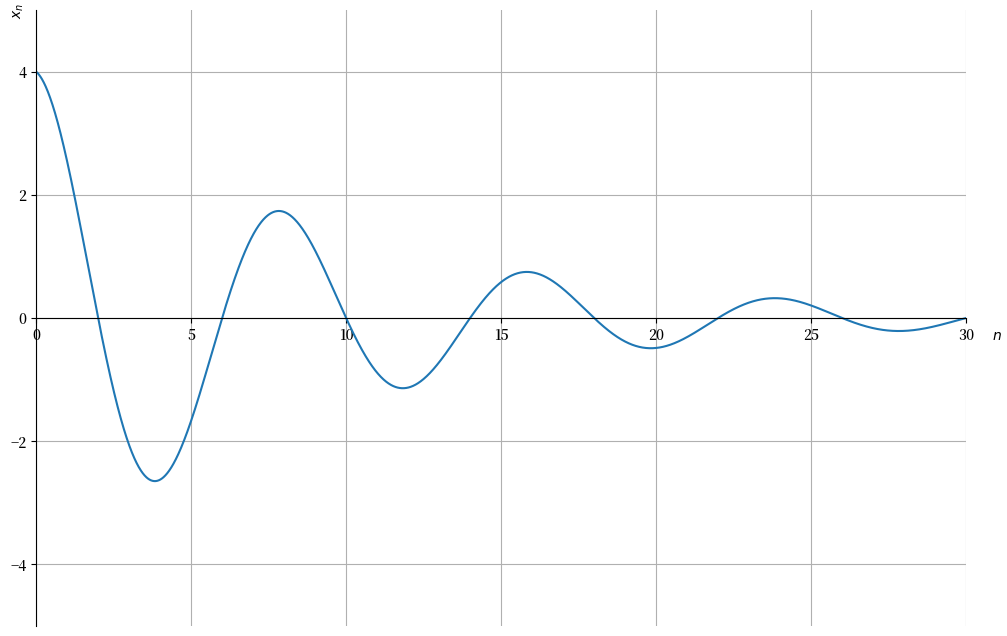

In [4]:
# 设定 n 的范围
max_n = 30
n = np.arange(0, max_n+1, 0.01)

# 设定 x_n
x = lambda n: 2 * p * r**n * np.cos(ω + n * θ)

# 绘图
fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(n, x(n))
ax.set(xlim=(0, max_n), ylim=(-5, 5), xlabel='$n$', ylabel='$x_n$')

# 将x轴放在图像中间
ax.spines['bottom'].set_position('center')
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

ticklab = ax.xaxis.get_ticklabels()[0] # 设定x标记的位置
trans = ticklab.get_transform()
ax.xaxis.set_label_coords(31, 0, transform=trans)

ticklab = ax.yaxis.get_ticklabels()[0] # 设定y标记的位置
trans = ticklab.get_transform()
ax.yaxis.set_label_coords(0, 5, transform=trans)

ax.grid()
plt.show()

### 三角恒等式

我们可以通过适当操作复数的极坐标形式来获得一套完整的三角恒等式。

我们将通过推导等式
$$
e^{i(\omega + \theta)} = e^{i\omega} e^{i\theta}
$$
来得到许多恒等式。

例如，我们将计算 $\cos{(\omega + \theta)}$ 和 $\sin{(\omega + \theta)}$ 的恒等式。

使用本讲座开始时给出的正弦和余弦公式，我们有：

$$
\begin{aligned}
\cos{(\omega + \theta)} = \frac{e^{i(\omega + \theta)} + e^{-i(\omega + \theta)}}{2} \\
\sin{(\omega + \theta)} = \frac{e^{i(\omega + \theta)} - e^{-i(\omega + \theta)}}{2i}
\end{aligned}
$$

我们还可以通过以下方式获得三角恒等式：

$$
\begin{aligned}
\cos{(\omega + \theta)} + i \sin{(\omega + \theta)}
&= e^{i(\omega + \theta)} \\
&= e^{i\omega} e^{i\theta} \\
&= (\cos{\omega} + i \sin{\omega})(\cos{\theta} + i \sin{\theta}) \\
&= (\cos{\omega}\cos{\theta} - \sin{\omega}\sin{\theta}) +
i (\cos{\omega}\sin{\theta} + \sin{\omega}\cos{\theta})
\end{aligned}
$$

由于上述公式的实部和虚部都应相等，我们得到：

$$
\begin{aligned}
\cos{(\omega + \theta)} = \cos{\omega}\cos{\theta} - \sin{\omega}\sin{\theta} \\
\sin{(\omega + \theta)} = \cos{\omega}\sin{\theta} + \sin{\omega}\cos{\theta}
\end{aligned}
$$

上述方程也被称为**角和恒等式**。我们可以使用`sympy`包中的`simplify`函数来验证这些方程：

In [5]:
# 设定符号
ω, θ = symbols('ω θ', real=True)

# 检查
print("cos(ω)cos(θ) - sin(ω)sin(θ) =",
    simplify(cos(ω)*cos(θ) - sin(ω) * sin(θ)))
print("cos(ω)sin(θ) + sin(ω)cos(θ) =",
    simplify(cos(ω)*sin(θ) + sin(ω) * cos(θ)))

cos(ω)cos(θ) - sin(ω)sin(θ) = cos(θ + ω)
cos(ω)sin(θ) + sin(ω)cos(θ) = sin(θ + ω)


### 三角积分

我们也可以使用复数的极坐标形式来计算三角积分。

例如，我们要解决以下积分：

$$
\int_{-\pi}^{\pi} \cos(\omega) \sin(\omega) \, d\omega
$$

使用欧拉公式，我们有：

$$
\begin{aligned}
\int \cos(\omega) \sin(\omega) \, d\omega
&=
\int
\frac{(e^{i\omega} + e^{-i\omega})}{2}
\frac{(e^{i\omega} - e^{-i\omega})}{2i}
\, d\omega  \\
&=
\frac{1}{4i}
\int
e^{2i\omega} - e^{-2i\omega}
\, d\omega  \\
&=
\frac{1}{4i}
\bigg( \frac{-i}{2} e^{2i\omega} - \frac{i}{2} e^{-2i\omega} + C_1 \bigg) \\
&=
-\frac{1}{8}
\bigg[ \bigg(e^{i\omega}\bigg)^2 + \bigg(e^{-i\omega}\bigg)^2 - 2 \bigg] + C_2 \\
&=
-\frac{1}{8}  (e^{i\omega} - e^{-i\omega})^2  + C_2 \\
&=
\frac{1}{2} \bigg( \frac{e^{i\omega} - e^{-i\omega}}{2i} \bigg)^2 + C_2 \\
&= \frac{1}{2} \sin^2(\omega) + C_2
\end{aligned}
$$

因此：

$$
\int_{-\pi}^{\pi} \cos(\omega) \sin(\omega) \, d\omega =
\frac{1}{2}\sin^2(\pi) - \frac{1}{2}\sin^2(-\pi) = 0
$$

我们可以使用`sympy`包中的`integrate`来验证分析结果和数值结果：

In [6]:
# 设置初始打印
init_printing(use_latex="mathjax")

ω = Symbol('ω')
print('cos(ω)sin(ω)积分的解析解为：')
integrate(cos(ω) * sin(ω), ω)

cos(ω)sin(ω)积分的解析解为：


   2   
sin (ω)
───────
   2   

In [7]:
print('cos(ω)sin(ω)从 -π 到 π 的积分的数值解为：')
integrate(cos(ω) * sin(ω), (ω, -π, π))

cos(ω)sin(ω)从 -π 到 π 的积分的数值解为：


0

### 练习

```{exercise}
:label: complex_ex1

我们邀请读者通过解析方法和使用 `sympy` 包来验证以下两个等式：
$$
\int_{-\pi}^{\pi} \cos (\omega)^2 \, d\omega = \pi
$$
$$
\int_{-\pi}^{\pi} \sin (\omega)^2 \, d\omega = \pi
$$
```

```{solution-start} complex_ex1
:class: dropdown
```
让我们从 `sympy` 导入符号 $\pi$

In [8]:
# 从 sympy 导入符号 π
from sympy import pi

In [9]:
print('cos(ω)**2 从 -π 到 π 的积分的解析解为：')

integrate(cos(ω)**2, (ω, -pi, pi))

cos(ω)**2 从 -π 到 π 的积分的解析解为：


π

In [10]:
print('sin(ω)**2 从 -π 到 π 的积分的解析解为：')

integrate(sin(ω)**2, (ω, -pi, pi))

sin(ω)**2 从 -π 到 π 的积分的解析解为：


π

```{solution-end}
```